# What is the danger of shrooming? 

- **Thora Mothes**
- **Mathias Ahrn**

## Introduction:

Shrooming refers to the act of looking for mushrooms or mushroom hunting. In this report predictions will be made as to how likely it is for a mushroom with certain characteristics to be poisonous or edible.

##### Dataset:
The chosen dataset for this report is called **<a href="https://archive.ics.uci.edu/ml/datasets/Mushroom">Mushrooms</a>**, and is a dataset consisting of descriptions of hypothetical samples corresponding to 23 species of mushroom in the Agaricus amd Lepiota Family. The data originally stems from the Audubon Society Field Guide to North American Mushrooms published in 1981, and was donated to <a href="https://archive.ics.uci.edu/ml/index.php">The UCI repository</a> in 1987. 

The dataset used in this report was downloaded from <a href="https://www.kaggle.com/uciml/mushroom-classification">Kaggle</a> as the UCI repository could not provide a CSV file. However the data from Kaggle has not been modified in any other way than formatting it into a CSV file. 

- Date downloaded: **12.09.2019**
- Hosted: **Thora Mothes GitHub Repo**
 

##### Goal:
In this report the goal is to predict whether or not a mushroom is edible. The feature used for output values is called "Class" and consists of values **e** and **p**, e for edible, and p for poisonous.

##### Features: 

When it comes to the features we will use for our models we will have two main criteria, we will try to find features that are easy for people to identify when they are looking for mushrooms and still give good enough accuracy for people not to be poisoned. 

Some of the most interesting features in this dataset are: 
- odor - This is a very easy one to identify for most people
- cap-color - This is also a very easy identifier
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from inspect import signature
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sns.set()

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ThoMot/DataHost/master/DataScience2019/mushrooms.csv")

## Data Exploration:

Taking an overall look at the data, it looks like there are no columns with any missing data. The data set consists of 8124 entries, each with attributes distibuted over 23 columns. All of the data are string values, which are categorical in nature. 

- 1. **Class** - What we are predicting, edible or poisonous
- 2. **cap-shape**
    - b: bell, c: conical, x: convex, f: flat, k: knobbed, s: sunken 
- 4. **Cap-surface** - How is the cap built? 
    -  f: fibrous, g: grooves, y: scaly, s: smooth
- 3. **Cap-color**
    - n: brown, b: buff, c: cinnamon, g: gray, r: green, p: pink, u: purple, e: red, w: white, y: yellow
- 4. **bruises** - Does the shroom have bruses on it?
    - true/false
- 5. **odor**
    - a: almond, l: anise, c: creosote, y: fishy, f: foul, m: musty, n: none, p: pungent, s: spicy
- 6. **gill-attachment** - How is the gill attached
    - a: attached, d: descending, f: free, n: notched
- 7. **gill-spacing** - How are the gills spaced out
    - c: close, w: crowded, d: distant
- 8. **gill-size**
    - b: broad, n: narrow
- 9. **gill-color** 
    - k: black, n: brown, b: buff, h: chocolate, g: gray,  r: green, o: orange, p: pink, u: purple, e: red, w: white, y: yellow
- 10. **stalk-shape** 
    - e: enlarging, t: tapering
- 11. **stalk-root** - Shape of the stalk root
    - b: bulbous, c: club, u: cup, e: equal, z: rhizomorphs, r: rooted, ?: missing
- 12. **stalk-surface-above-ring**
    - f: fibrous, y: scaly, k: silky, s: smooth
- 13. **stalk-surface-below-ring** 
    - f: fibrous, y: scaly, k. silky, s: smooth
- 14. **stalk-color-above-ring**
    - n: brown, b:. buff, c: cinnamon, g: gray, o: orange, p:  pink, e: red, w: white, y: yellow
- 15. **stalk-color-below-ring**
    - n: brown, b: buff, c: cinnamon, g: gray, o: orange, p:  pink, e: red, w: white, y: yellow
- 16. **veil-type** 
    - p: partial, u: universal
- 17. **veil-color** 
    - n: brown, o: orange, w: white, y: yellow
- 18. **ring-number** 
    - n: none, o: one, t: two
- 19. **ring-type** 
    - c: cobwebby, e: evanescent, f: flaring, l: large, n: none, p: pendant, s: sheathing, z: zone
- 20. **spore-print-color**
    - k: black n: brown, b: buff, h: chocolate, r: green, o:  orange, u:. purple, w: white, y: yellow
- 21. **population** 
    - a: abundant, c: clustered, n: numerous, s: scattered, v: several, y: solitary
- 22. **habitat**: 
    - g: grasses, l: leaves, m: meadows, p: paths, u: urban, w: waste, d: woods

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

When looking at df.info() it initially looks like there are no missing values. But when looking into the data of the stalk-root feature, we can tell that there are actually quite a few missing values in this column. When graphing this column based on the class of mushroom, edible/poinsonous we can see that a high percentage of this column is missing. This is denoted by a questionmasrk **?** in this dataset. 

In [4]:
df["stalk-root"].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

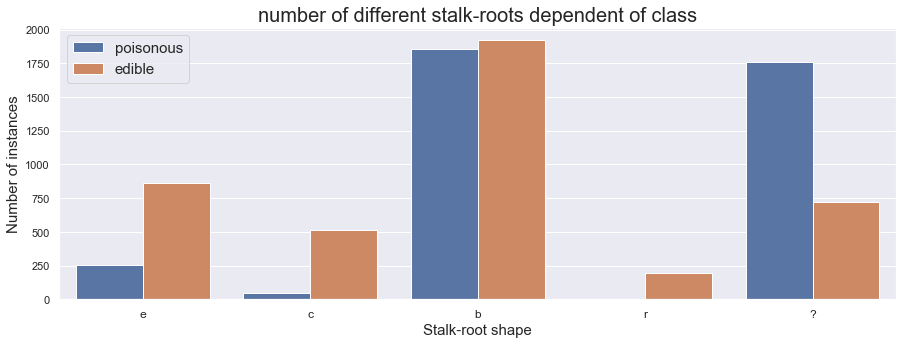

In [5]:
plt.figure(figsize=(15,5));
sns.countplot(df["stalk-root"], hue=df["class"]);
plt.title("number of different stalk-roots dependent of class", size="20");
plt.xlabel("Stalk-root shape", size="15");
plt.ylabel("Number of instances", size="15"); 
plt.legend(["poisonous", "edible"], prop={'size': 15});
plt.xticks(size="12");


It is important to look into whether or not the dataset is imbalanced. If the data is imbalanced, one class has a lot more instances than the other. The best classifcation situation would be one where there are about equally as many instances of both classes.

The plot below shows the distribution of the two different classes we are going to predict. There seem to be slightly more edible mushrooms than poisonous ones. It seems like we have a fairly balanced dataset.

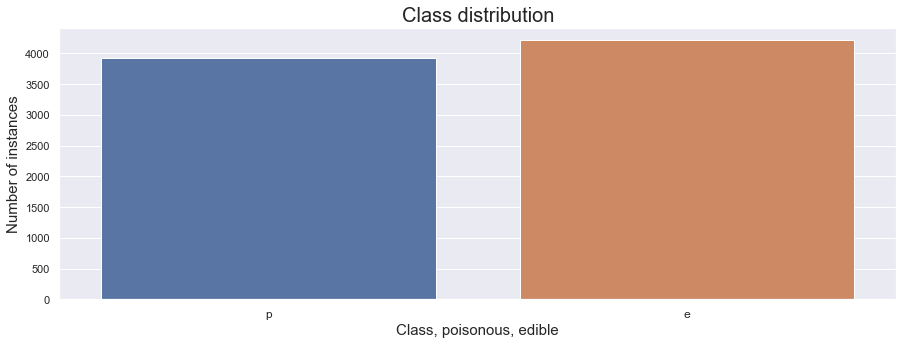

In [6]:
plt.figure(figsize=(15,5));
sns.countplot(df["class"]);
plt.title("Class distribution", size="20");
plt.xlabel("Class, poisonous, edible", size="15");
plt.ylabel("Number of instances", size="15"); 
plt.xticks(size="12");

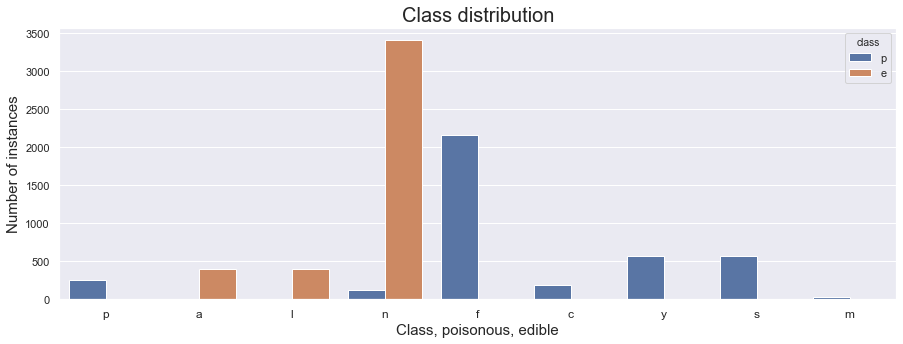

In [7]:
plt.figure(figsize=(15,5));
sns.countplot(df["odor"], hue=df["class"]);
plt.title("Class distribution", size="20");
plt.xlabel("Class, poisonous, edible", size="15");
plt.ylabel("Number of instances", size="15"); 
plt.xticks(size="12");

When looking at the subplots below, we can tell that some columns are very skewed towards one value. 
- veil-type only contains values of type p
- veil-color contains an overwhelming amount of white instances
- gill-attachment contains a very skewed amount of values for free
- ring-number is very skewed towards one ring

In [8]:
df["veil-type"].value_counts()

p    8124
Name: veil-type, dtype: int64

In [9]:
df["veil-color"].value_counts()

w    7924
o      96
n      96
y       8
Name: veil-color, dtype: int64

In [10]:
df["gill-attachment"].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [11]:
df["ring-number"].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

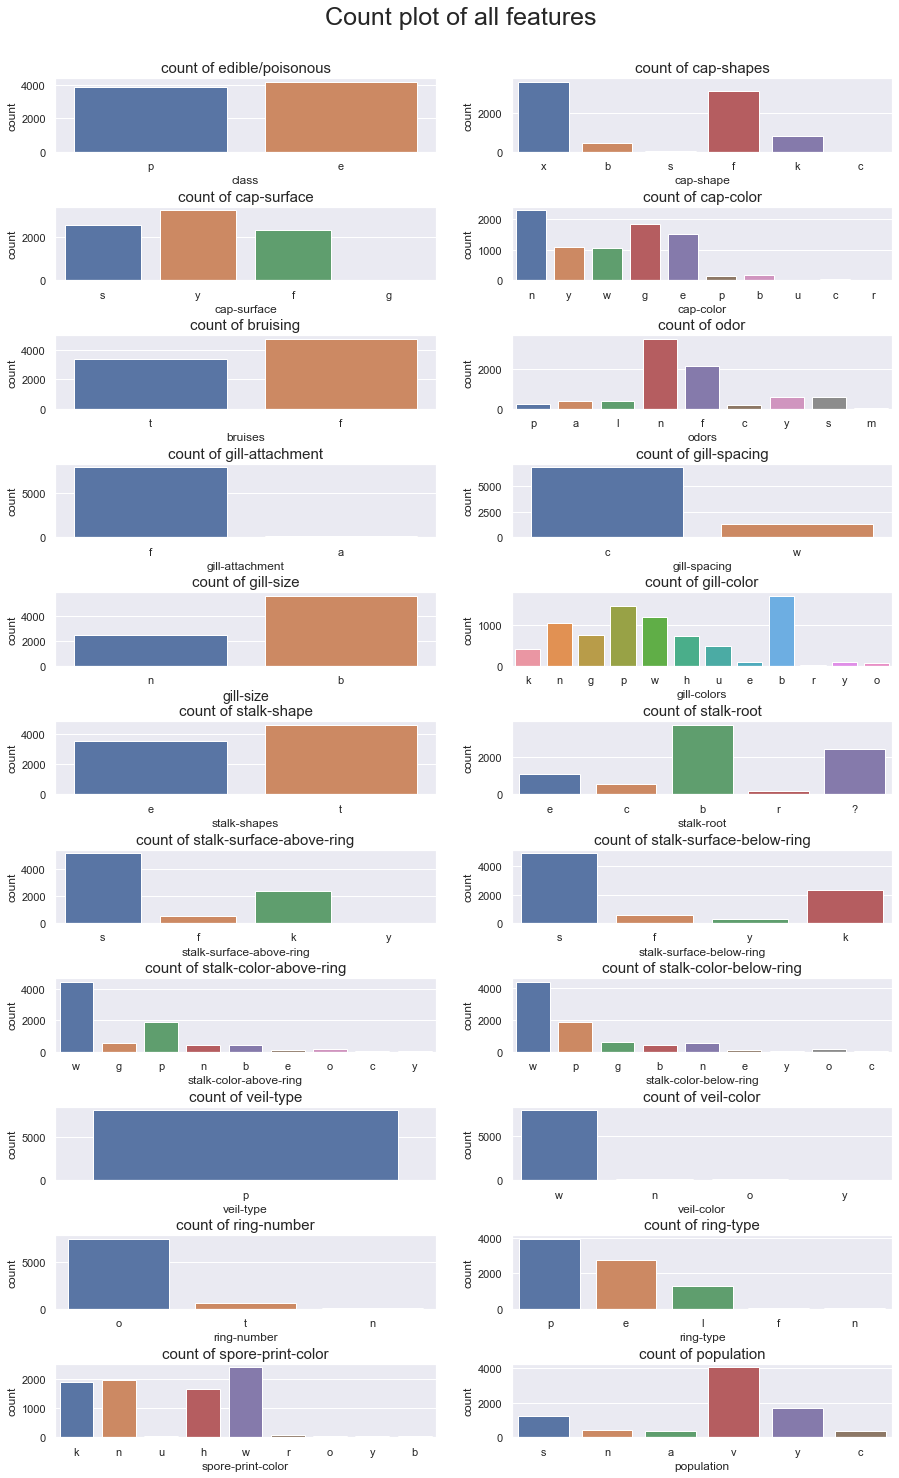

In [12]:
fig, ax = plt.subplots(11,2, figsize=(15,25))
fig.suptitle("Count plot of all features", size=25, y=0.92)

sns.countplot(df["class"], ax=ax[0,0])
ax[0,0].set_title("count of edible/poisonous", size="15");
ax[0,0].set_xlabel("class", size="12")

sns.countplot(df["cap-shape"], ax=ax[0,1])
ax[0,1].set_title("count of cap-shapes", size="15");
ax[0,1].set_xlabel("cap-shape", size="12")

sns.countplot(df["cap-surface"], ax=ax[1,0])
ax[1,0].set_title("count of cap-surface", size="15");
ax[1,0].set_xlabel("cap-surface", size="12")

sns.countplot(df["cap-color"], ax=ax[1,1])
ax[1,1].set_title("count of cap-color", size="15");
ax[1,1].set_xlabel("cap-color", size="12")

sns.countplot(df["bruises"], ax=ax[2,0])
ax[2,0].set_title("count of bruising", size="15");
ax[2,0].set_xlabel("bruises", size="12")

sns.countplot(df["odor"], ax=ax[2,1])
ax[2,1].set_title("count of odor", size="15");
ax[2,1].set_xlabel("odors", size="12")

sns.countplot(df["gill-attachment"], ax=ax[3,0])
ax[3,0].set_title("count of gill-attachment", size="15");
ax[3,0].set_xlabel("gill-attachment", size="12")

sns.countplot(df["gill-spacing"], ax=ax[3,1])
ax[3,1].set_title("count of gill-spacing", size="15");
ax[3,1].set_xlabel("gill-spacing", size="12")

sns.countplot(df["gill-size"], ax=ax[4,0])
ax[4,0].set_title("count of gill-size", size="15");
ax[4,0].set_xlabel("gill-size", size="14")

sns.countplot(df["gill-color"], ax=ax[4,1])
ax[4,1].set_title("count of gill-color", size="15");
ax[4,1].set_xlabel("gill-colors", size="12")

sns.countplot(df["stalk-shape"], ax=ax[5,0])
ax[5,0].set_title("count of stalk-shape", size="15");
ax[5,0].set_xlabel("stalk-shapes", size="12")

sns.countplot(df["stalk-root"], ax=ax[5,1])
ax[5,1].set_title("count of stalk-root", size="15");
ax[5,1].set_xlabel("stalk-root", size="12")

sns.countplot(df["stalk-surface-above-ring"], ax=ax[6,0])
ax[6,0].set_title("count of stalk-surface-above-ring", size="15");
ax[6,0].set_xlabel("stalk-surface-above-ring", size="12")

sns.countplot(df["stalk-surface-below-ring"], ax=ax[6,1])
ax[6,1].set_title("count of stalk-surface-below-ring", size="15");
ax[6,1].set_xlabel("stalk-surface-below-ring", size="12")

sns.countplot(df["stalk-color-above-ring"], ax=ax[7,0])
ax[7,0].set_title("count of stalk-color-above-ring", size="15");
ax[7,0].set_xlabel("stalk-color-above-ring", size="12")

sns.countplot(df["stalk-color-below-ring"], ax=ax[7,1])
ax[7,1].set_title("count of stalk-color-below-ring", size="15");
ax[7,1].set_xlabel("stalk-color-below-ring", size="12")

sns.countplot(df["veil-type"], ax=ax[8,0])
ax[8,0].set_title("count of veil-type", size="15");
ax[8,0].set_xlabel("veil-type", size="12")

sns.countplot(df["veil-color"], ax=ax[8,1])
ax[8,1].set_title("count of veil-color", size="15");
ax[8,1].set_xlabel("veil-color", size="12");

sns.countplot(df["ring-number"], ax=ax[9,0])
ax[9,0].set_title("count of ring-number", size="15");
ax[9,0].set_xlabel("ring-number", size="12");

sns.countplot(df["ring-type"], ax=ax[9,1])
ax[9,1].set_title("count of ring-type", size="15");
ax[9,1].set_xlabel("ring-type", size="12");

sns.countplot(df["spore-print-color"], ax=ax[10,0])
ax[10,0].set_title("count of spore-print-color", size="15");
ax[10,0].set_xlabel("spore-print-color", size="12");

sns.countplot(df["population"], ax=ax[10,1])
ax[10,1].set_title("count of population", size="15");
ax[10,1].set_xlabel("population", size="12");
plt.subplots_adjust(hspace = 0.75)

## Data Cleaning

- Based on the plots we used to explore the data we can tell that stalk-root had a lot of missing values. it will not be very useful in making predictions. This feature will be dropped.
- Veil-type only contains values of type p which means that this column is the same for every instance in the dataset. It is therefore not useful in making predictions and it will be removed. 
- veil-color had very few values of any other type than white
- ring-number had very few values of any other type than one ring
- gill-attachment had very few values of any other type than free

In [13]:
df.drop(columns=["veil-type", "stalk-root", "veil-color", "ring-number", "gill-attachment"], inplace=True)

The target variable is set to 0 = poisonous and 1 = edible.

In [14]:
df["class"] = (df["class"] == "e").astype(int)

Since all of the data we are working with is categorical we need to get dummies of the dataframe so we can use it in scikit-learn.

In [15]:
columns = df.columns[df.columns != "class"]
df1 = df.drop(columns=["class"])
df1 = pd.get_dummies(df1, columns=columns)
df1.shape

(8124, 102)

The dataframe now has 111 columns/features, that all contain numeric non-categorical data, ready for scikit-learn machine learning.

# Model 1 - Naive Bayes

For the first model we will be using Naive Bayes, since this is a very fast and easy classification model to implement. However we should be careful of strongly correlated values.

In [16]:
X = df1.values
y = df["class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Accuracy
When looking at the baseline accuracy this seems reasonable from the plot we made in exploration of the class variable, where we saw a distribution of almost 50/50. The accuracy of the model however comes out to 0.981 which is very very high. It seems that the data we are working with gives extremely good predictions when using all the features of the set.

In [17]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("The baseline accuracy is: {:.3}".format(1 - y_train.mean()))
print("The accuracy of the model is: {:.3}".format(clf.score(X_test, y_test)))

The baseline accuracy is: 0.481
The accuracy of the model is: 0.981


In [18]:
def print_conf_mtx(y_true, y_pred, classes=None):
    """ Print a confusion matrix (two classes only). """
    
    if not classes:
        classes = ['poisonous', ' edible']
   	 
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left   	= '{:<10s}'.replace('10',str(n))
    right  	= '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    
    cm = confusion_matrix(y_test, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))

def getPrecision(y_true, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    pospos = cm[[1],1]
    poscol = cm[[0],1]
    return (pospos / (pospos + poscol))[0]

def getRecall(y_true, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    #print(cm.shape)
    pospos = cm[[1],1]
    posrow = cm[[1],0]
    return (pospos / (pospos + posrow))[0]

def precisionRecallCurve(y_probs, y_test):
    thresholds = np.linspace(0,1,100)
    precision_vals = []
    recall_vals = []
    for t in thresholds:
        y_pred = (y_probs > t).astype(int)
        precision_vals.append(precision_score(y_pred, y_test))
        recall_vals.append(recall_score(y_pred, y_test))
    ticks = np.linspace(0,1,10)
    labels = ticks.round(1)
    precision_vals = np.array(precision_vals)
    recall_vals = np.array(recall_vals)
    precision_vals = np.insert(precision_vals, 0, 1.0)
    recall_vals = np.insert(recall_vals, 0, 0)
    recall_vals[-1] = 1.0
    plt.title("Precision/Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.fill_between(recall_vals, precision_vals, alpha=0.2, color='b')
    plt.plot(recall_vals, precision_vals)


#### Confusion Matrix

When looking at the confusion matrix it looks like both the precision and recall values are very good. The precision is better than the recall, which is very important for this kind of classification problem it is very important to get the ones predicted to be edible to actually be edible because the consequences of false positives in this case could be death.

In [19]:
print_conf_mtx(y_test, y_pred)

             predicted     
actual   poisonous   edible
poisonous     1180        1
 edible         46     1211


#### Precision/Recall

- Precision: of the positive predictions, what fraction are correct
- Recall: of the positive cases, which fraction are predicted positive

We definitely want a higher precision than recall here even though there in this canse only is a very small difference.

In [20]:
print("Precision: {:.2f}".format(getPrecision(y_test, y_pred)))
print("Recall: {:.2f}".format(getRecall(y_test, y_pred)))

Precision: 1.00
Recall: 0.96


In [21]:
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  clf.fit(X_train1, y_train1)

  tr_predicted = clf.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  te_predicted = clf.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

#### Learning Curve

Looking at the learning cure we can tell that the error is very small, even at the beginning of the graph. And the graphs are following each other very very closely. 

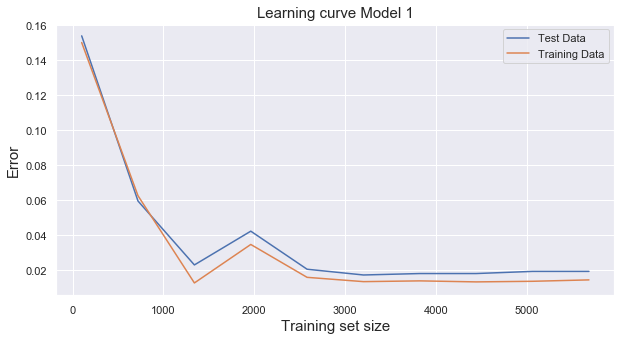

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tr_sizes, y=te_errs);
sns.lineplot(x=tr_sizes, y=tr_errs);
plt.title("Learning curve Model 1", size=15);
plt.xlabel("Training set size", size=15);
plt.ylabel("Error", size=15);
plt.legend(['Test Data', 'Training Data']);

# Model 2 - Naive Bayes with Feature Selection

#### Feature Selection:

For the second model we will do feature selection to try to see if we can get the same accuracy as in the previous model with fewer features. When letting the algorithm pick the best 10 columns, we can see that we get an accuracy of 1 at feature number 6.

In [23]:
X = df1.values
y = df["class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, y_train);


def bestFeatures(num):
    remaining = list(range(X_train.shape[1]))
    selected = []
    n = num
    while len(selected) < n:
        min_acc = -1e7
        for i in remaining:
            X_i = X_train[:,selected+[i]]
            scores = cross_val_score(GaussianNB(), X_i, y_train,
           scoring='accuracy', cv=3)
            accuracy = scores.mean() 
            if accuracy > min_acc:
                min_acc = accuracy
                i_min = i

        remaining.remove(i_min)
        selected.append(i_min)
        print('num features: {}; accuracy: {:.2f}'.format(len(selected), min_acc))
    return selected

In [24]:
selected = df1.columns[bestFeatures(10)]

num features: 1; accuracy: 0.89
num features: 2; accuracy: 0.94
num features: 3; accuracy: 0.96
num features: 4; accuracy: 0.96
num features: 5; accuracy: 0.99
num features: 6; accuracy: 1.00
num features: 7; accuracy: 1.00
num features: 8; accuracy: 1.00
num features: 9; accuracy: 1.00
num features: 10; accuracy: 1.00


Here we see that the best features picked by the algorithm are to do with odor, habitat and spore print color. These are features that might be easy for people to identify, however spore prints might not always be present and stalk color below the ring can also be hard to distinguish. We will explore if we can find such features that are easier to observe and give good accuracy in the next model.

In [25]:
predictors = selected[0:6].values
print("The best 6 features are:", predictors)

The best 6 features are: ['odor_n' 'odor_a' 'habitat_m' 'spore-print-color_r' 'odor_l'
 'stalk-color-below-ring_y']


#### Correlation Plot of chosen features

This heatmap shows the correlation between the features chosen in feature selection. Naive Bayes models don't do well with strongly correlated features, in this plot we can tell that habitat seems to be somewhat correlated with odors almond and anise but the model does not seem to suffer from this.

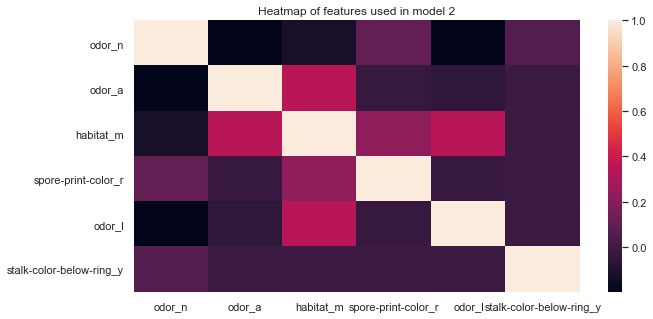

In [26]:
plt.figure(figsize=(10,5))
corr = df1[predictors].corr();
sns.heatmap(corr);
plt.title("Heatmap of features used in model 2");

Training our new model using the predictors found by feature selection

In [27]:
X = df1[predictors].values
y = df["class"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

clf2 = GaussianNB();
clf2.fit(X_train, y_train);

#### Accuracy
Looking at the accuracy for this model it has gone up by 0.01 percent using these six predictors. This is a very good model for predicting edible mushrooms.

In [28]:
y_pred = clf2.predict(X_test)
print("The baseline accuracy is: {:.3}".format(1 - y_train.mean()))
print("The accuracy of the model is: {:.3}".format(clf2.score(X_test, y_test)))

The baseline accuracy is: 0.481
The accuracy of the model is: 0.996


#### Confusion Matrix:

Looking at the confusion Matrix for the model we can tell that the results have changed ever so slightly. There is now a better Recall value while Precision has gone a bit down. One could argue that this development is not favourable since it is very bad to predict a mushroom to be edible and it ending up actually being poisonous.

In [29]:
print_conf_mtx(y_test, y_pred)

             predicted     
actual   poisonous   edible
poisonous     1172        9
 edible          0     1257


#### Precision/Recall:

The precision recall values are confirming what we saw in the confusion matrix, that Recall is now perfect while Precision has gone down, even if only by a little.

In [30]:
print("Precision: {:.3f}".format(getPrecision(y_test, y_pred)))
print("Recall: {:.3f}".format(getRecall(y_test, y_pred)))

Precision: 0.993
Recall: 1.000


#### Learning Curve:

The learning curve looks very interesting. We can tell that the error is very very small. We do not seem to have a high variance case since the training error is so low and the gap between the curves is pretty small. It does not look like a high bias problem either since the training error is so low. It looks like the model is fitted very well to the training data and that it works very well for the test data.

In [31]:
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  clf2.fit(X_train1, y_train1)

  tr_predicted = clf2.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  te_predicted = clf2.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

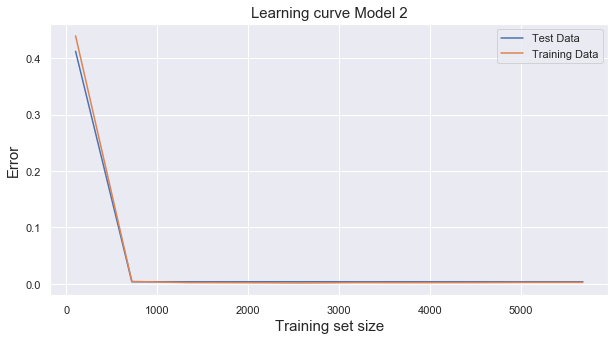

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tr_sizes, y=te_errs);
sns.lineplot(x=tr_sizes, y=tr_errs);
plt.title("Learning curve Model 2", size=15);
plt.xlabel("Training set size", size=15);
plt.ylabel("Error", size=15);
plt.legend(['Test Data', 'Training Data']);

# Model 3 - Naive Bayes - Making the most usable prediction model

In this model we will try to make to most usable prediction model possible by selecting features that are easy for people going shrooming to distiguish between. The features we selected are: 
- cap-surface
- odor 
- cap-shape
These are all features that should be easily distinguishable when going out looking for mushrooms and it should be easy for people to take note of these characteristics. We are getting dummy variables for these featues as they are categorical in nature.

In [33]:
cols = ["cap-surface", "odor", "cap-shape"]
df3 = df[cols]
df3 = pd.get_dummies(df3)

In [34]:
X = df3.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf3 = GaussianNB()
clf3.fit(X_train, y_train);

#### Forward feature selection: 

When doing forward feature selection based on the features we chose for this model, we get an accuracy of 99 when we get to 5 features.

In [35]:
selected = df3.columns[bestFeatures(5)]

num features: 1; accuracy: 0.89
num features: 2; accuracy: 0.94
num features: 3; accuracy: 0.96
num features: 4; accuracy: 0.96
num features: 5; accuracy: 0.99


The best five features to use for these predictions according to forward feature selection are: 
- odor none
- odor almond
- cap shape bell
- cap shape conical
- odor anise

In [36]:
predictors3 = selected[0:10].values
print("The best 5 features are:", predictors3)

The best 5 features are: ['odor_n' 'odor_a' 'cap-shape_b' 'cap-shape_c' 'odor_l']


#### Correlation Plot

It does not seem like any of the features used in this model are strongly correlated. This is very good for Naive bayes predictions.

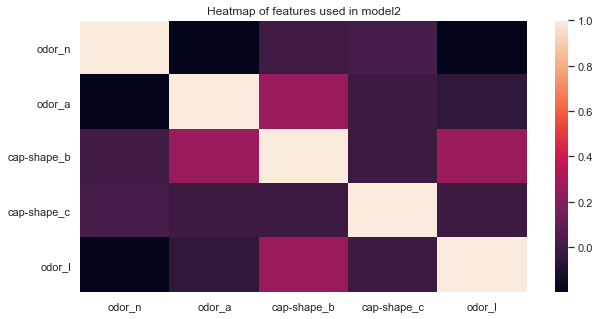

In [37]:
plt.figure(figsize=(10,5))
corr3 = df3[predictors3].corr();
sns.heatmap(corr3);
plt.title("Heatmap of features used in model2");

#### Accuracy

The accuracy of the model is high at 0.985. This isn't a perfect model like we almost acheived with forward feature selection in the previous model, but it is still high enough to be reasonably good at predicting edible mushrooms.

In [38]:
y_pred = clf3.predict(X_test)
print("The baseline accuracy is: {:.3}".format(1 - y_train.mean()))
print("The accuracy of the model is: {:.3}".format(clf3.score(X_test, y_test)))

The baseline accuracy is: 0.481
The accuracy of the model is: 0.985


#### Confusion Matrix

When looking at the confusion matrix produced for this model we can tell that the recall is perfect while the precision is a little bit off. It is not much but there are still 36 mushrooms that will be classified aas edible that are actually poisonous. This is not a good outcome. However it is a very very small fraction. One could argue that is would be very important to get precision to 1 here, because you would not want people believing in your model and then ending up being severely poisoned. 

In [39]:
print_conf_mtx(y_test, y_pred)

             predicted     
actual   poisonous   edible
poisonous     1145       36
 edible          0     1257


#### Precision/ Recall

Like stated in the previous paragraph we can tell that Recall is perfect and we have a little bit to go on when it comes to precision. Hwever, precision for this classification is still really good at 0.97.

In [40]:
print("Precision: {:.3f}".format(getPrecision(y_test, y_pred)))
print("Recall: {:.3f}".format(getRecall(y_test, y_pred)))

Precision: 0.972
Recall: 1.000


In [41]:
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  clf3.fit(X_train1, y_train1)

  tr_predicted = clf3.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  te_predicted = clf3.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

#### Learning Curve

This learning curve also shows us a very small error. However, it does look like we get a very low error for the training data that actaully goes back up a bit when getting to around 1500 in training size. We also have a point where the two curves intersect at right before 1000 instances. The two lines do however smooth out and stay fairly close to each other as more data is provided. It looks like it is stabilizing at around an error of 0.0150.

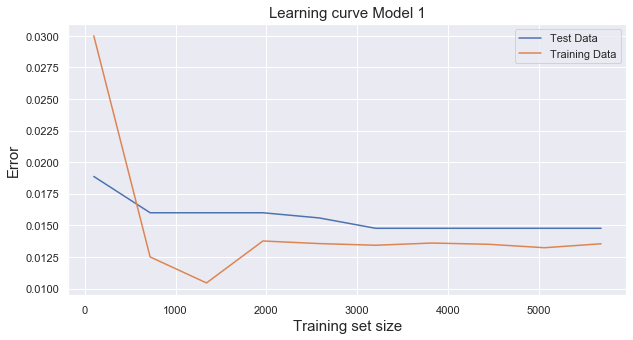

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tr_sizes, y=te_errs);
sns.lineplot(x=tr_sizes, y=tr_errs);
plt.title("Learning curve Model 1", size=15);
plt.xlabel("Training set size", size=15);
plt.ylabel("Error", size=15);
plt.legend(['Test Data', 'Training Data']);

#### Conclusion Model 3: 

It looks like overall we ended up with a marginally lower accuracy and a little bit of a lower precision for this model than for the last model using feature selection on all features in the dataset. However this might be a more usable model for poeple actually in the woods looking for mushrooms. The features we worked with in this case are easier to distinguish than the ones found in the previous even more accurate model.

# Tree Classifiers

# Model 4 - Tree Classification - All Features

For the fourth model we are using a tree classifier to compare to our earlier naive bayes models. First we are making a model using all the features in the dataset to see if we get as good of an accuracy here as we did with Naive Bayes.

In [43]:
np.random.seed(42)

In [44]:
X = df1.values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

clf4 = DecisionTreeClassifier(max_depth=3, random_state=0);
clf4.fit(X_train, y_train);

#### Tree Graph

A graph displaying our model fit to the training data is produced. From the graph we can tell that our baseline accuracy should be 0.48 since looking at all data points, 48% of the mushrooms are poisonous. So if we haven't looked at the dataset at all before guessing that a mushroom is poisonous, we have a 48% chance of being right.

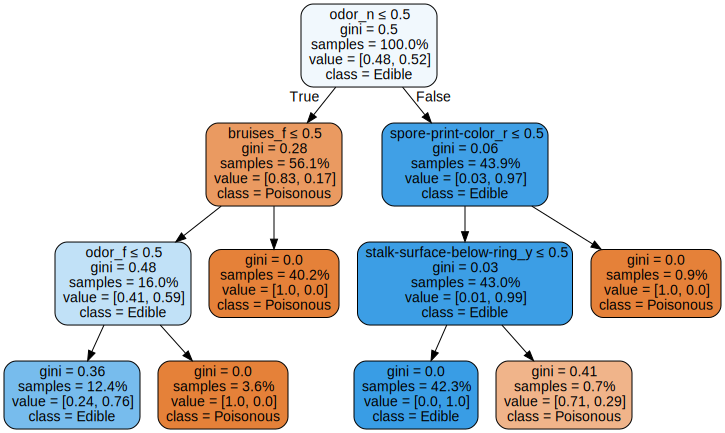

In [45]:
target_names = ['Poisonous', 'Edible']
dot_data = export_graphviz(clf4, precision=2,
feature_names=df1.columns.values,
proportion=True,
class_names=target_names,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Accuracy: 

The accuracy for this model is the same as we got in the first Naive bayes model. 

In [46]:
print("Baseline Accuracy: {:.3}".format(1-y_train.mean()))
y_predict = clf.predict(X_test)
print("Accuracy of Model: {:.3}".format((y_predict == y_test).mean()))

Baseline Accuracy: 0.481
Accuracy of Model: 0.981


#### Confusion Matrix:

When looking at the confusion matrix it does look identical to the Naive bayes model we made using all features of the dataset. The difference in the two models when it comes to precision and recall seem to be indistinguishable.

In [47]:
print_conf_mtx(y_test, y_predict)

             predicted     
actual   poisonous   edible
poisonous     1180        1
 edible         46     1211


#### Precision/Recall: 

The precision and recall values are good values for this classification problem as we would want the least amount of people to die, using our classifier. In this case 1 person would eat a mushrom wrongly classified as edible when it is not. This still gives us a precision of 1 when rounded to three decimals.

In [48]:
print("Precision: {:.2f}".format(getPrecision(y_test, y_predict)))
print("Recall: {:.2f}".format(getRecall(y_test, y_predict)))

Precision: 1.00
Recall: 0.96


In [49]:
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  clf4.fit(X_train1, y_train1)

  tr_predicted = clf4.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  te_predicted = clf4.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

#### Learning Curve: 

The learning curve is what is the most different from our first naive bayes model using all features. We can tell that the error on the training data is pretty much stable except for a slight increase at the end of the graph. But the error is still very very small. The error on the test data decreases rapidly just like in the first model we made but then it straightens out and doesnt have a spike around 2000 instances like our naive bayaes model did. 

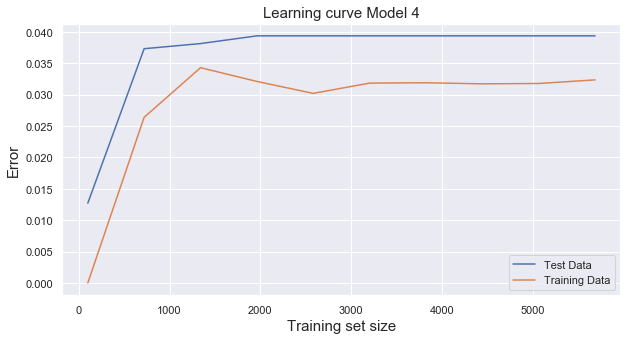

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tr_sizes, y=te_errs);
sns.lineplot(x=tr_sizes, y=tr_errs);
plt.title("Learning curve Model 4", size=15);
plt.xlabel("Training set size", size=15);
plt.ylabel("Error", size=15);
plt.legend(['Test Data', 'Training Data']);

#### Conclusion Model 5: 

It seems like the tree classifier does just as well as the bayes model when using all the features of the dataset. The main difference between the two models is the learning cure and how the classifiers develop when getting more data to practice and test on.

# Model 5 - Tree Classifier - The Most Usable prediction model

Earlier we defined a few features that were easy for people to identify when mushroom hunting and that gave a good enough accuracy to where it would be useful. We are now going to take a look at how a tree classifier treats the same features.
The features in question are: 
- cap-surface
- odor
- cap-shape

In [51]:
X = df3.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
def bestTreeFeatures(num):
    remaining = list(range(X_train.shape[1]))
    selected = []
    n = num
    while len(selected) < n:
        min_acc = -1e7
        for i in remaining:
            X_i = X_train[:,selected+[i]]
            scores = cross_val_score(DecisionTreeClassifier(max_depth=5, random_state=42), X_i, y_train,
           scoring='accuracy', cv=3)
            accuracy = scores.mean() 
            if accuracy > min_acc:
                min_acc = accuracy
                i_min = i

        remaining.remove(i_min)
        selected.append(i_min)
        print('num features: {}; accuracy: {:.2f}'.format(len(selected), min_acc))
    return selected

#### Forward feature selection

When doing forward feature slection using the same 3 features made into dummy variables we can tell that this model actually reaches an accuracy of 0.99 at three features, as opposed to our previous model that needed 5 features. 

In [53]:
selected = df3.columns[bestTreeFeatures(5)]

num features: 1; accuracy: 0.89
num features: 2; accuracy: 0.94
num features: 3; accuracy: 0.99
num features: 4; accuracy: 0.99
num features: 5; accuracy: 0.99


Looking at the three best columns we can tell that this classifier actually gets a 0.99 accuracy only using odor, which is only one feature from our original dataframe. Now made into three columns using dummy variables. This is really interestng. Maybe people can distingush edible mushrooms based only on their smell.
- odor none
- odor almond
- odor anis

In [54]:
predictors = selected[0:3].values
print("The best 3 features are:", predictors)

The best 3 features are: ['odor_n' 'odor_a' 'odor_l']


#### Tree graph

The tree we produce from fitting our model to the trainig data. The max depth is set to 3, and our baseline accuracy is once again 48 percent when predicting that a mushroom is poisonous. At the leaf nodes there is still a good amount of samples left. 

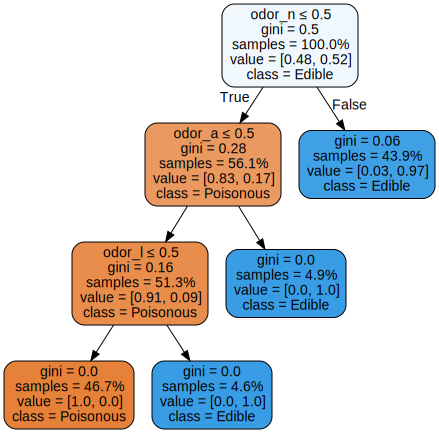

In [55]:
X = df1[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

clf5 = DecisionTreeClassifier(max_depth=3, random_state=0);
clf5.fit(X_train, y_train);

target_names = ['Poisonous', 'Edible']
dot_data = export_graphviz(clf5, precision=2,
feature_names=df1[predictors].columns.values,
proportion=True,
class_names=target_names,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Accuracy 

The accuracy of this model is 0.001 worse than the previous model we used for predicting on these columns. The accuracy is however still very high.

In [56]:
print("Baseline Accuracy: {:.3f}".format(1-y_train.mean()))
y_predict5 = clf5.predict(X_test)
print("Model 5 Accuracy: {:.3f}".format((y_predict5 == y_test).mean()))

Baseline Accuracy: 0.481
Model 5 Accuracy: 0.984


#### Confusion Matrix

In this confusion matrix we have two more instances that were predicted edible that are in fac poisonous. We can expect precision to be marginally lower in this model than in the Naive Bayes model. Recall is still at 1. 

In [57]:
print_conf_mtx(y_test, y_predict5)

             predicted     
actual   poisonous   edible
poisonous     1142       39
 edible          0     1257


In [58]:
print("Precision: {:.3f}".format(getPrecision(y_test, y_predict5)))
print("Recall: {:.3f}".format(getRecall(y_test, y_predict5)))

Precision: 0.970
Recall: 1.000


#### Precision / Recall Curve

The following precision/recall curve is close to a perfect curve which supports the confusion matrix we got for this model. We can see that there is a drop in precision when recall goes from 0.9 to 1.0. 

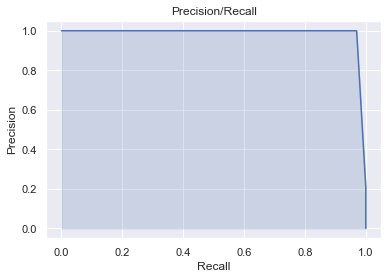

In [59]:
y_probs = clf5.predict_proba(X_test)
y_probs = y_probs[:,1]
precisionRecallCurve(y_probs, y_test)

#### ROC curve

By looking at the ROC curve, we can see the same trend from the precision/recall curve that the model predicts some false positive while true positive is nearly perfect with an AUC rating of 0.99.

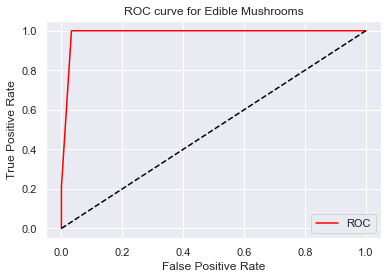

AUC: 0.99


In [60]:
auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Edible Mushrooms')
plt.legend()
plt.show()
print('AUC: %.2f' % auc)

#### Learning Curve

In [61]:
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  clf5.fit(X_train1, y_train1)

  tr_predicted = clf5.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  te_predicted = clf5.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

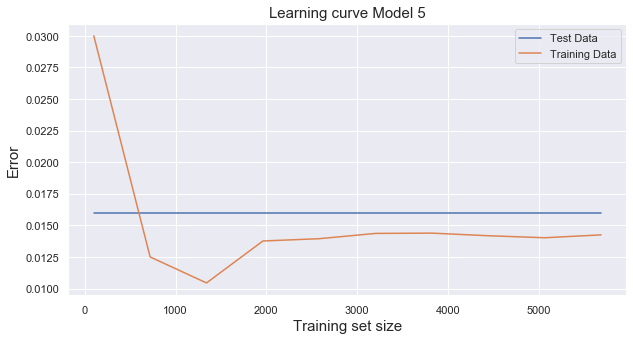

In [62]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tr_sizes, y=te_errs);
sns.lineplot(x=tr_sizes, y=tr_errs);
plt.title("Learning curve Model 5", size=15);
plt.xlabel("Training set size", size=15);
plt.ylabel("Error", size=15);
plt.legend(['Test Data', 'Training Data']);

#### Conclusion Model 5: 

We saw an equal accuracy in feature selection as in the previous one using only 3 features instead of 5. However the actual accuracy when making predictions seem to be marginally lower than the Naive bayes model. The precision value decreased a ittle, so 2 more mushrooms that are correctly classified in the previous model are wrondly classified as edible in this classifier.

# Logistic Regression

# Model 6 - Logistic Regression - All Features

For the sixth and seventh model we are going to look into Logistic regression nd how it compares to the other two types of models, Naive bayes and Tree Classifier.

#### Accuracy

The baseline accuracy is at 0.48 which means that for half of the predictions there is a close to 50% chance to predict correct.

After training the model with all the features, we get 100% accuracy. Like we have seen in the other models it seems we have features in the data that makes it easy to predict on all features. This is however a slightly better accuracy than what we have seen for all features in the previous models using all features.

In [63]:
X = df1.values
y = df["class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log = LogisticRegression()
log.fit(X_train, y_train)
print("Baseline accuracy: {:.2f}".format(1-y_train.mean()))
print("Logistic regression accuracy: {:.2}".format(log.score(X_test, y_test)))

Baseline accuracy: 0.48
Logistic regression accuracy: 1.0


#### Confusion Matrix

Looking at these values this model has very good precision and recall. only one single person will potentially get sick from eating a poisonous mushroom that was classified as edible. This of course is very unfortunate for this person, but it seems like this is the best case scenario for out prediction models.  

In [64]:
y_pred = log.predict(X_test)
print_conf_mtx(y_test, y_pred)

             predicted     
actual   poisonous   edible
poisonous     1180        1
 edible          0     1257


#### Precision / Recall

When looking at the precision and recall values for this model, we can see that when rounding to three numbers we get a value of 1 for both precision and recall which is very very good. 

In [65]:
print("Precision: {:.4f}".format(getPrecision(y_test, y_pred)))
print("Recall: {:.4f}".format(getRecall(y_test, y_pred)))

Precision: 0.9992
Recall: 1.0000


In [66]:
from sklearn.metrics import f1_score
print("F1 score: {:.4f}".format(f1_score(y_test, y_pred)))

F1 score: 0.9996


#### Precision / Recall Curve

The precision recall curve of this model looks very good. And that goes well with the accuracy we saw when calculation it earlier and the precision recall values. It shows us that we can accheive a 1 for recall as well as for precision at the same time which is what we acheived with the model.

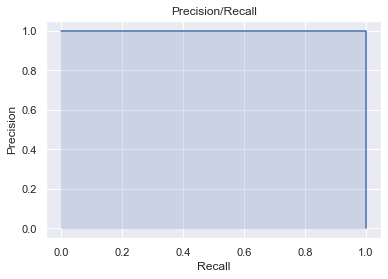

In [67]:
y_probs = log.predict_proba(X_test)
y_probs = y_probs[:,1]
precisionRecallCurve(y_probs, y_test)

#### ROC curve



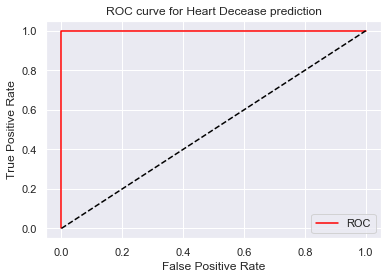

AUC: 1.00


In [68]:
auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Heart Decease prediction')
plt.legend()
plt.show()
print('AUC: %.2f' % auc)

In [69]:
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)
for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  clf.fit(X_train1, y_train1)

  tr_predicted = log.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  te_predicted = log.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

#### Learning Curve



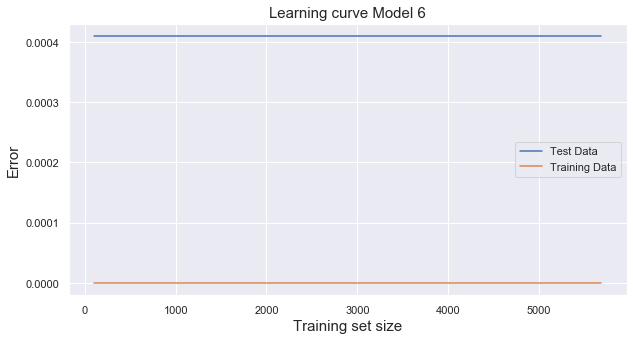

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tr_sizes, y=te_errs);
sns.lineplot(x=tr_sizes, y=tr_errs);
plt.title("Learning curve Model 6", size=15);
plt.xlabel("Training set size", size=15);
plt.ylabel("Error", size=15);
plt.legend(['Test Data', 'Training Data']);